<a href="https://colab.research.google.com/github/Tahan402/DailyPractice/blob/main/LG_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [23]:
#upload the dataset
from google.colab import files
data_to_load = files.upload()

Saving Real estate.csv to Real estate (2).csv


In [24]:
import io
realestate_data = pd.read_csv(io.BytesIO(data_to_load['Real estate.csv']))

In [25]:
#lets check the data
realestate_data.head(10)

,No,X1_transaction _date,X2_house_age,X3_nearest_mrt_station,X4_number_of_convenience_stores,X5 _latitude,X6_longitude,Y_house_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


We have six Input variable(x)

*   Transaction date
*   House age

*   Distance to the nearest mrt station
*   Number of convenience stores

*   Latitude
*   Longitude

Output variable(y)


*   House price of unit area










In [26]:
#Checking the number of rows and columns
realestate_data.shape

(414, 8)

There are 414 rows and 8 columns in the
data set.

In [27]:
#information about each column
realestate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   No                               414 non-null    int64  
 1   X1_transaction _date             414 non-null    float64
 2   X2_house_age                     414 non-null    float64
 3   X3_nearest_mrt_station           414 non-null    float64
 4   X4_number_of_convenience_stores  414 non-null    int64  
 5   X5 _latitude                     414 non-null    float64
 6   X6_longitude                     414 non-null    float64
 7   Y_house_price                    414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Inference:

We see above the information 414 entries in every column, which means there is no null value present in the dataset.

In [28]:
#dataset numeric details
realestate_data.describe()

,No,X1_transaction _date,X2_house_age,X3_nearest_mrt_station,X4_number_of_convenience_stores,X5 _latitude,X6_longitude,Y_house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [29]:
realestate_data.columns

Index(['No', 'X1_transaction _date', 'X2_house_age', 'X3_nearest_mrt_station',
       'X4_number_of_convenience_stores', 'X5 _latitude', 'X6_longitude',
       'Y_house_price'],
      dtype='object')

## Visualize the relationship between features (input vars) and the target (output var)

Use Scatterplots

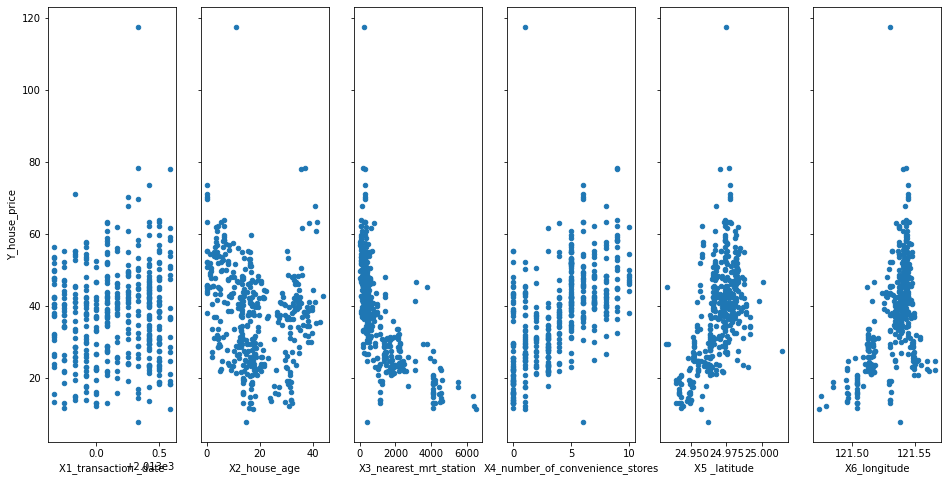

In [31]:
#realestate_data['X1 transaction date'] = realestate_data['x1']
#x2= realestate_data['X2 house age']
#x3= realestate_data['X3 distance to the nearest MRT station']
#x4= realestate_data['X4 number of convenience stores']
#x5= realestate_data['X5 latitude']
#x6= realestate_data['X6 longitude']
#y= realestate_data['Y house price of unit area']

fig,axs = plt.subplots(1,6 , sharey= True)
realestate_data.plot(kind = 'scatter', x='X1_transaction _date', y='Y_house_price',ax=axs[0],figsize=(16,8))

realestate_data.plot(kind = 'scatter', x='X2_house_age', y='Y_house_price',ax=axs[1])

realestate_data.plot(kind = 'scatter', x='X3_nearest_mrt_station',y='Y_house_price', ax=axs[2])

realestate_data.plot(kind = 'scatter', x= 'X4_number_of_convenience_stores' ,y='Y_house_price',ax=axs[3]
                     )
realestate_data.plot(kind = 'scatter', x= 'X5 _latitude',y='Y_house_price' , ax=axs[4])

realestate_data.plot(kind = 'scatter', x='X6_longitude',y='Y_house_price',ax=axs[5])
plt.show()

Create the model

In [32]:
#check the columns names
realestate_data.columns

Index(['No', 'X1_transaction _date', 'X2_house_age', 'X3_nearest_mrt_station',
       'X4_number_of_convenience_stores', 'X5 _latitude', 'X6_longitude',
       'Y_house_price'],
      dtype='object')

In [35]:
lm = smf.ols(formula = 'Y_house_price ~ X2_house_age + X3_nearest_mrt_station + X4_number_of_convenience_stores + X6_longitude', data= realestate_data).fit()

In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Y_house_price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     120.9
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           5.54e-68
Time:                        03:44:52   Log-Likelihood:                -1506.2
No. Observations:                 414   AIC:                             3022.
Df Residuals:                     409   BIC:                             3042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 